# Прогнозируем, когда уйдет сотрудник :c
<img src="https://zhazhda.biz/wp-content/uploads/2016/11/bolshaya-87-1024x890.png" height="1000" width="530">

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
data = pd.read_csv('C:/Users/user/Desktop/agapi.csv')
print('Размер выборки:', data.shape)                      
data = data.drop(['city_name'], axis=1)
data = data.drop(['gender_full'], axis=1)                      
data = data.drop(['recorddate_key'], axis=1)
data = data.drop(['birthdate_key'], axis=1)
data.head() 

Размер выборки: (49653, 18)


,EmployeeID,orighiredate_key,terminationdate_key,age,length_of_service,department_name,job_title,store_name,gender_short,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
0,1318,8/28/1989,1/1/1900,52,17,Executive,CEO,35,M,Not Applicable,Not Applicable,2006,ACTIVE,HEADOFFICE
1,1318,8/28/1989,1/1/1900,53,18,Executive,CEO,35,M,Not Applicable,Not Applicable,2007,ACTIVE,HEADOFFICE
2,1318,8/28/1989,1/1/1900,54,19,Executive,CEO,35,M,Not Applicable,Not Applicable,2008,ACTIVE,HEADOFFICE
3,1318,8/28/1989,1/1/1900,55,20,Executive,CEO,35,M,Not Applicable,Not Applicable,2009,ACTIVE,HEADOFFICE
4,1318,8/28/1989,1/1/1900,56,21,Executive,CEO,35,M,Not Applicable,Not Applicable,2010,ACTIVE,HEADOFFICE


In [4]:
data = data.drop (['termtype_desc', 'termreason_desc'], axis=1)

## 1. Предобработка данных

In [5]:
# Скажем пандасу, что мы считаем store_name и STATUS_YEAR категориальной, а не числовой
data['store_name'] = data['store_name'].astype(str)
data['STATUS_YEAR'] = data['STATUS_YEAR'].astype(str)
data['STATUS'] = data['STATUS'].astype(str)

In [6]:
target_var = ['STATUS']  # целевая переменнаяб далее буду иследовать как непрерывную
categor_var = ['orighiredate_key','terminationdate_key', 'department_name', 
               'job_title','gender_short', 'store_name', 'BUSINESS_UNIT', 'STATUS_YEAR']     # категориальные
contin_var = ['EmployeeID', 'age', 'length_of_service'] # непрерывные 

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49653 entries, 0 to 49652
Data columns (total 12 columns):
EmployeeID             49653 non-null int64
orighiredate_key       49653 non-null object
terminationdate_key    49653 non-null object
age                    49653 non-null int64
length_of_service      49653 non-null int64
department_name        49653 non-null object
job_title              49653 non-null object
store_name             49653 non-null object
gender_short           49653 non-null object
STATUS_YEAR            49653 non-null object
STATUS                 49653 non-null object
BUSINESS_UNIT          49653 non-null object
dtypes: int64(3), object(9)
memory usage: 4.5+ MB


In [8]:
data.isnull().sum()

EmployeeID             0
orighiredate_key       0
terminationdate_key    0
age                    0
length_of_service      0
department_name        0
job_title              0
store_name             0
gender_short           0
STATUS_YEAR            0
STATUS                 0
BUSINESS_UNIT          0
dtype: int64

In [9]:
data.isnull().sum()/len(data)

EmployeeID             0.0
orighiredate_key       0.0
terminationdate_key    0.0
age                    0.0
length_of_service      0.0
department_name        0.0
job_title              0.0
store_name             0.0
gender_short           0.0
STATUS_YEAR            0.0
STATUS                 0.0
BUSINESS_UNIT          0.0
dtype: float64

In [10]:
data.STATUS = data.STATUS.map({'ACTIVE':0, 'TERMINATED':1})

## 2. Категориальные переменные

In [11]:

data[categor_var].head()

,orighiredate_key,terminationdate_key,department_name,job_title,gender_short,store_name,BUSINESS_UNIT,STATUS_YEAR
0,8/28/1989,1/1/1900,Executive,CEO,M,35,HEADOFFICE,2006
1,8/28/1989,1/1/1900,Executive,CEO,M,35,HEADOFFICE,2007
2,8/28/1989,1/1/1900,Executive,CEO,M,35,HEADOFFICE,2008
3,8/28/1989,1/1/1900,Executive,CEO,M,35,HEADOFFICE,2009
4,8/28/1989,1/1/1900,Executive,CEO,M,35,HEADOFFICE,2010


In [12]:
len(data['orighiredate_key'].unique())

4415

In [13]:
len(data['terminationdate_key'].unique())

1055

In [14]:
len(data['department_name'].unique())

21

In [15]:
len(data['job_title'].unique())

47

In [16]:
len(data['gender_short'].unique())

2

In [17]:
len(data['STATUS'].unique())

2

In [18]:
len(data['store_name'].unique())

46

In [19]:
len(data['BUSINESS_UNIT'].unique())

2

In [20]:
len(data['STATUS_YEAR'].unique())

10

## 3. Посчитаем частоты для каждого возможного значения переменной

In [21]:
# orighiredate_key уникальное значение > 20
frequency_encoding = dict(data['orighiredate_key'].value_counts()/len(data))
data['orighiredate_key'] = data['orighiredate_key'].map(frequency_encoding)

In [22]:
# terminationdate_key уникальное значение > 20
frequency_encoding = dict(data['terminationdate_key'].value_counts()/len(data))
data['terminationdate_key'] = data['terminationdate_key'].map(frequency_encoding)

In [23]:
# department_name уникальное значение > 20
frequency_encoding = dict(data['department_name'].value_counts()/len(data))
data['department_name'] = data['department_name'].map(frequency_encoding)

In [24]:
# job_title уникальное значение > 20
frequency_encoding = dict(data['job_title'].value_counts()/len(data))
data['job_title'] = data['job_title'].map(frequency_encoding)

In [25]:
# store_name уникальное значение > 20
frequency_encoding = dict(data['store_name'].value_counts()/len(data))
data['store_name'] = data['store_name'].map(frequency_encoding)

In [26]:
catt_var = ['orighiredate_key', 'terminationdate_key', 'department_name', 'job_title', 'store_name']     # категориальные
data_catt = data[catt_var]
data_catt.head()

,orighiredate_key,terminationdate_key,department_name,job_title,store_name
0,0.000806,0.854933,0.002014,0.000201,0.02302
1,0.000806,0.854933,0.002014,0.000201,0.02302
2,0.000806,0.854933,0.002014,0.000201,0.02302
3,0.000806,0.854933,0.002014,0.000201,0.02302
4,0.000806,0.854933,0.002014,0.000201,0.02302


In [27]:
cat_var = ['gender_short', 'BUSINESS_UNIT', 'STATUS_YEAR']

In [28]:
data_cat = data[cat_var]
data_cat.head()

,gender_short,BUSINESS_UNIT,STATUS_YEAR
0,M,HEADOFFICE,2006
1,M,HEADOFFICE,2007
2,M,HEADOFFICE,2008
3,M,HEADOFFICE,2009
4,M,HEADOFFICE,2010


In [29]:
data_cat = pd.get_dummies(data[cat_var], dummy_na=True, drop_first=True)
data_cat.head()

,gender_short_M,gender_short_nan,BUSINESS_UNIT_STORES,BUSINESS_UNIT_nan,STATUS_YEAR_2007,STATUS_YEAR_2008,STATUS_YEAR_2009,STATUS_YEAR_2010,STATUS_YEAR_2011,STATUS_YEAR_2012,STATUS_YEAR_2013,STATUS_YEAR_2014,STATUS_YEAR_2015,STATUS_YEAR_nan
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,1,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [30]:
data_categor = pd.concat([data_cat, data_catt], axis=1)
data_categor.head()

,gender_short_M,gender_short_nan,BUSINESS_UNIT_STORES,BUSINESS_UNIT_nan,STATUS_YEAR_2007,STATUS_YEAR_2008,STATUS_YEAR_2009,STATUS_YEAR_2010,STATUS_YEAR_2011,STATUS_YEAR_2012,STATUS_YEAR_2013,STATUS_YEAR_2014,STATUS_YEAR_2015,STATUS_YEAR_nan,orighiredate_key,terminationdate_key,department_name,job_title,store_name
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000806,0.854933,0.002014,0.000201,0.02302
1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0.000806,0.854933,0.002014,0.000201,0.02302
2,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0.000806,0.854933,0.002014,0.000201,0.02302
3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0.000806,0.854933,0.002014,0.000201,0.02302
4,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0.000806,0.854933,0.002014,0.000201,0.02302


## 4. Непрерывные переменные

In [31]:
data_contin = data[contin_var]
data_contin.head() # непрерывные переменные

,EmployeeID,age,length_of_service
0,1318,52,17
1,1318,53,18
2,1318,54,19
3,1318,55,20
4,1318,56,21


In [32]:
data_contin.isnull().sum()

EmployeeID           0
age                  0
length_of_service    0
dtype: int64

In [33]:
data = pd.concat([data[target_var],data_contin, data_categor], axis=1)
data.head()

,STATUS,EmployeeID,age,length_of_service,gender_short_M,gender_short_nan,BUSINESS_UNIT_STORES,BUSINESS_UNIT_nan,STATUS_YEAR_2007,STATUS_YEAR_2008,...,STATUS_YEAR_2012,STATUS_YEAR_2013,STATUS_YEAR_2014,STATUS_YEAR_2015,STATUS_YEAR_nan,orighiredate_key,terminationdate_key,department_name,job_title,store_name
0,0,1318,52,17,1,0,0,0,0,0,...,0,0,0,0,0,0.000806,0.854933,0.002014,0.000201,0.02302
1,0,1318,53,18,1,0,0,0,1,0,...,0,0,0,0,0,0.000806,0.854933,0.002014,0.000201,0.02302
2,0,1318,54,19,1,0,0,0,0,1,...,0,0,0,0,0,0.000806,0.854933,0.002014,0.000201,0.02302
3,0,1318,55,20,1,0,0,0,0,0,...,0,0,0,0,0,0.000806,0.854933,0.002014,0.000201,0.02302
4,0,1318,56,21,1,0,0,0,0,0,...,0,0,0,0,0,0.000806,0.854933,0.002014,0.000201,0.02302


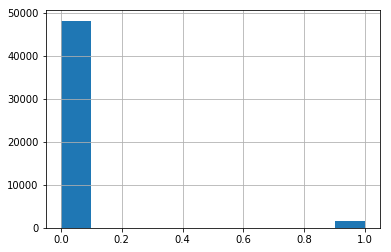

In [34]:
data.STATUS.hist()

## 5. Половина работы уже сделана!

<img src="https://pp.userapi.com/c543104/v543104009/48e04/uVHHVlRULQU.jpg" height="1500" width="1030">

## 6. Разбиение на тренировочную выборку и тестовую

In [35]:
y = data['STATUS'].values
x = data.drop('STATUS', axis=1).values
x.shape, y.shape

((49653, 22), (49653,))

In [36]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

print (x_train.shape, y_train.shape)
print (x_test.shape, y_test.shape)

(34757, 22) (34757,)
(14896, 22) (14896,)


## 7. Метод ближайшего соседа

In [37]:
from sklearn.neighbors import KNeighborsClassifier

clf_knn = KNeighborsClassifier(n_neighbors=1)
clf_knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [38]:
y_predicted = clf_knn.predict(x_test)
y_predicted

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [39]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('Accuracy =', accuracy_score(y_test, y_predicted))
print('Precision =', precision_score(y_test, y_predicted))
print('Recall =', recall_score(y_test, y_predicted))
print('F1_score =', f1_score(y_test, y_predicted))

Accuracy = 0.964889903329753
Precision = 0.3955773955773956
Recall = 0.3675799086757991
F1_score = 0.3810650887573964


In [40]:
clf_knn = KNeighborsClassifier(n_neighbors=10)  # возьмем не один ближайший объект, а 10
clf_knn.fit(x_train, y_train)
y_predicted = clf_knn.predict(x_test)

In [41]:
print('Accuracy =', accuracy_score(y_test, y_predicted))
print('Precision =', precision_score(y_test, y_predicted))
print('Recall =', recall_score(y_test, y_predicted))
print('F1_score =', f1_score(y_test, y_predicted))

Accuracy = 0.9702604726100966
Precision = 0.2727272727272727
Recall = 0.00684931506849315
F1_score = 0.013363028953229395


In [42]:
y_proba = clf_knn.predict_proba(x_test)
y_proba[:10]

array([[1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.7, 0.3],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ]])

In [43]:
y_predicted = (y_proba [:,1] >= 0.5)
y_predicted[:10]

array([False, False, False, False, False, False, False, False, False,
       False])

In [44]:
print('Accuracy =', accuracy_score(y_test, y_predicted))
print('Precision =', precision_score(y_test, y_predicted))
print('Recall =', recall_score(y_test, y_predicted))
print('F1_score =', f1_score(y_test, y_predicted))

Accuracy = 0.9693877551020408
Precision = 0.32
Recall = 0.0365296803652968
F1_score = 0.06557377049180328


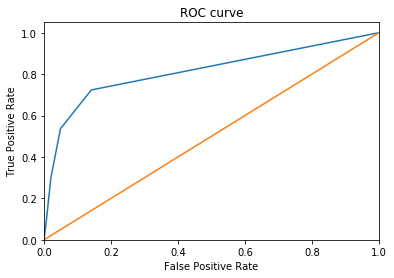

In [45]:
from sklearn.metrics import roc_auc_score, roc_curve


fpr, tpr, thresholds = roc_curve(y_test, y_proba[:,1])


plt.plot(fpr, tpr, label='ROC curve ')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

In [46]:
# считаем площадь под кривой
print('AUC =', roc_auc_score(y_test, y_proba[:,1]))

AUC = 0.8132462569900155


## 8. Деревья и лес

In [47]:
from sklearn.tree import DecisionTreeClassifier 

In [48]:
clf_tree = DecisionTreeClassifier()     
clf_tree.fit(x_train, y_train)          
y_predicted = clf_tree.predict(x_test)  
y_proba = clf_tree.predict_proba(x_test)

Accuracy = 0.9963077336197637
Precision = 0.9284116331096197
Recall = 0.9474885844748858
F1_score = 0.9378531073446327
AUC = 0.9737766643864041


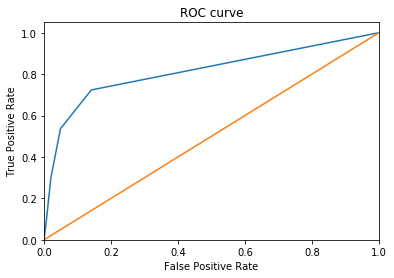

In [49]:
print('Accuracy =', accuracy_score(y_test, y_predicted))
print('Precision =', precision_score(y_test, y_predicted))
print('Recall =', recall_score(y_test, y_predicted))
print('F1_score =', f1_score(y_test, y_predicted))
print('AUC =', roc_auc_score(y_test, y_proba[:,1]))

# Рисуем картиночку
plt.plot(fpr, tpr, label='ROC curve ')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

In [50]:
featureImportance = pd.DataFrame({"feature": data.drop('STATUS',axis=1).columns, 
                                  "importance": clf_tree.feature_importances_})

featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance

,importance
feature,
age,0.564358
terminationdate_key,0.204599
STATUS_YEAR_2015,0.060595
STATUS_YEAR_2014,0.039909
EmployeeID,0.035363
length_of_service,0.024938
orighiredate_key,0.012760
store_name,0.010670
STATUS_YEAR_2011,0.007141


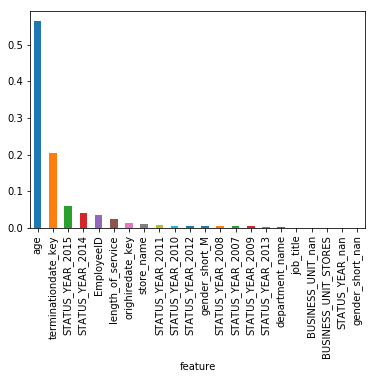

In [51]:
featureImportance["importance"].plot('bar')

In [52]:
from sklearn.ensemble import RandomForestClassifier

In [53]:
rfc = RandomForestClassifier(n_estimators=10) # число деревьев в лесе
rfc.fit(x_train, y_train)
y_predicted = rfc.predict(x_test)
y_proba = rfc.predict_proba(x_test)

Accuracy = 0.9956364124597207
Precision = 0.9745547073791349
Recall = 0.8744292237442922
F1_score = 0.9217809867629362
AUC = 0.9945820076543552


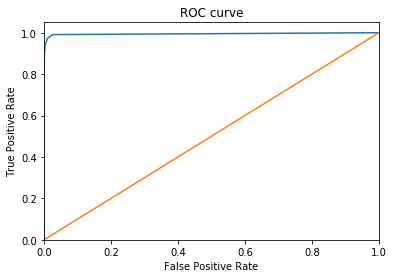

In [54]:
print('Accuracy =', accuracy_score(y_test, y_predicted))
print('Precision =', precision_score(y_test, y_predicted))
print('Recall =', recall_score(y_test, y_predicted))
print('F1_score =', f1_score(y_test, y_predicted))
print('AUC =', roc_auc_score(y_test, y_proba[:,1]))

fpr, tpr, thresholds = roc_curve(y_test, y_proba[:,1])

plt.plot(fpr, tpr, label='ROC curve ')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

In [55]:
from sklearn.linear_model import LogisticRegression
# объявляем модель
logit = LogisticRegression()
# обучаем на тренировочной выборке
logit.fit(x_train, y_train)
# предсказываем вероятности
logit.predict_proba(x_test)
# предсказываем сами метки классов
logit.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

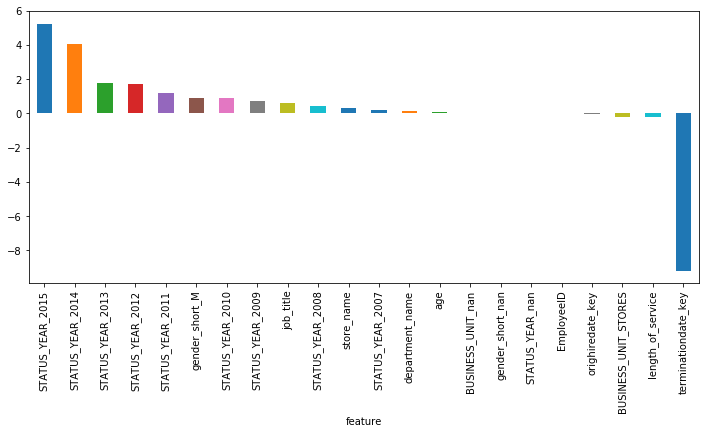

In [56]:
featureImportance = pd.DataFrame({"feature": data.drop('STATUS',axis=1).columns, 
"importance": logit.coef_[0]})

featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].head(30).plot('bar', figsize=(12,5))
featureImportance["importance"].tail(30).plot('bar', figsize=(12,5))

## 9. Подбор гиперпараметров

In [57]:
from sklearn.model_selection import GridSearchCV

parameters = {'n_neighbors':range(2, 25, 5), 'weights':['uniform', 'distance']}

knc = KNeighborsClassifier()

clf = GridSearchCV(knc, parameters)

clf.fit(x_train, y_train)
clf.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [58]:
y_proba = clf.predict_proba(x_test)[:,1]
print('AUC =', roc_auc_score(y_test, y_proba))

AUC = 0.7294494492313115


In [59]:
parameters = {
              'n_estimators': [10,15,20,25,30],           
              'min_samples_leaf': [1, 3, 5, 7, 10],        
             } 

rfc = RandomForestClassifier(random_state=42)   

gcv = GridSearchCV(rfc, parameters, n_jobs= -1) 
gcv.fit(x, y)
gcv.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=7, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [60]:
y_predicted = gcv.predict(x_test)
y_proba = gcv.predict_proba(x_test)

## 10. Метрики

In [61]:
from sklearn import metrics  

In [62]:
print('Accuracy =', metrics.accuracy_score(y_test, y_predicted))

Accuracy = 0.9964419978517723


In [63]:
print('Precision =', metrics.precision_score(y_test, y_predicted))

Precision = 0.9974160206718347


In [64]:
print('Recall =', metrics.recall_score(y_test, y_predicted))

Recall = 0.8812785388127854


In [65]:
print('F1_score =', metrics.f1_score(y_test, y_predicted))

F1_score = 0.9357575757575758


In [66]:
y_proba = clf.predict_proba(x_test)[:,1]
print('AUC =', roc_auc_score(y_test, y_proba))

AUC = 0.7294494492313115


In [67]:
print(metrics.classification_report(y_test, y_predicted))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00     14458
          1       1.00      0.88      0.94       438

avg / total       1.00      1.00      1.00     14896



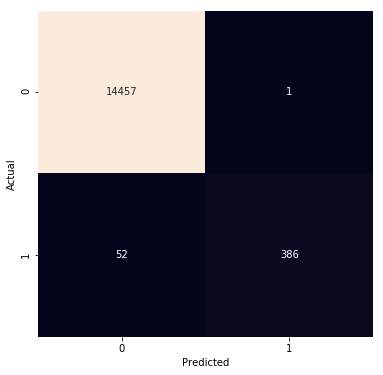

In [68]:
import seaborn as sns 
from sklearn.metrics import confusion_matrix 
array = confusion_matrix(y_test, y_predicted) 
df_cm = pd.DataFrame(array) 
plt.figure(figsize = (6,6)) 
sns.heatmap(df_cm, annot=True, fmt='g', cbar=False) 
plt.ylabel("Actual") 
plt.xlabel("Predicted");

# That's all!!!

<img src="https://pp.userapi.com/c543104/v543104009/48df2/osaDAMmd_dc.jpg" height="1500" width="1030">